In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import scipy as scs

In [2]:
def SPICEfileReader (filetoread,columns):
    'reads LTSpice files, needs '' over the file name and the number of columns in the file'
    f=open(filetoread,'r')#opens the file
    dum = f.readlines()[1:]#reads the data, but skips the first line as they are column titles 
    f.close()#closes the file
    data=[]#empty array for the data later
    for i in dum: #goes through all the data
        dum1=i.split('\t')#splits the data at every column, making rows
        for j in dum1:#goes through each of these rows
            data.append(float(j.split('\n')[0]))#splits the data at the end point, and gets rid of the new row command from the data
    rows=int(len(data)/columns)#caluclates how many rows there are
    out=np.reshape(data,(rows,columns))#re-shapes the data into a useable format
    return(out)#returns the data
file_path = 'D:\\harry\\PhD Work\\Project_Michael\\Data\\HP Memristor example 1hz ron10k roff100k xinit 0.9 d27nm'
data = SPICEfileReader(file_path,3)
st = data[:,0]
sv = data[:,1]
si = data[:,2]

In [7]:
def vteam_optim_pro(v,w,koff,kon):
    'Memristor model based on the VTEAM model, input paramaters are'

    voff = 0.1
    von = -0.1
    roff = 100e3
    ron = 10e3
    woff = 27e-9
    won = 0
    p = 2
    j = 4
    aon = 2
    aoff = 2
    dt=0.01024
    def prodromakis(x,p,j):
        dum=(x-0.5)**2
        dum1=(dum+0.75)**p
        return(j*(1-dum1))

    def dw(v,koff,kon,aoff,aon,voff,von,woff,won,w,p,j,dt):
        x = w / (woff-won) 
        if 0<voff<v:
            dum = koff*(((v/voff)-1)**aoff)
            func = prodromakis(x,p,j)
            return(dum*func*dt)


        if von<v<voff:
            return(0)

        if v<von<0:
            dum = kon*(((v/von)-1)**aon)
            func = prodromakis(x,p,j)
            return(dum*func*dt)

        else: 
            return(0)

    def  linear(roff,ron,woff,won,v,w):
        dum = (roff-ron)/(woff-won)
        dum1 = ((dum * (w-won))+ron)**(-1)
        return((dum1*v))


    out=[]
    boundarypos=[]
    test = []
    rel = linear
    for k in range(len(v)):
        if k!=0:
            change=dw(v[k],koff,kon,aoff,aon,voff,von,woff,won,w,p,j,dt)
            w=w+change
            out.append(rel(roff,ron,woff,won,v[k],w))
        else:
            out.append(rel(roff,ron,woff,won,v[k],w))
    return(out)

In [6]:
for i in range(len(st)):
    if i != 0:
        print(st[i]-st[i-1])

0.01006310719926526
0.010239999999999588
0.010239999999999583
0.010240000000002886
0.010240000000003142
0.010240000000003142
0.010239999999996884
0.01023999999999603
0.01023999999999603
0.010239999999996058
0.010239999999996002
0.010239999999995988
0.010240000000007105
0.010240000000010213
0.010240000000010296
0.010240000000010185
0.010240000000010296
0.010240000000010213
0.010240000000010185
0.010240000000010324
0.010240000000010185
0.010240000000010296
0.010240000000010213
0.010240000000010296
0.010240000000010213
0.010240000000010185
0.010240000000010185
0.010240000000010296
0.010240000000010241
0.010240000000010296
0.010240000000010185
0.010240000000010296
0.010240000000010185
0.010240000000010185
0.010240000000010352
0.010240000000010185
0.010240000000010296
0.010240000000010185
0.010240000000010185
0.010240000000010296
0.010240000000010241
0.010240000000010296
0.010240000000010185
0.010240000000010185
0.010240000000010296
0.010240000000010241
0.010240000000010296
0.01024000000001

Above is used to find the timesteps used by LTSpice, not all the time steps are the same but they are mostly around 0.01024

In [44]:
t=st
f=1
vamp=1
v=(vamp*np.sin(2*math.pi*f*st))
koff = 0.75e-8
kon = -0.75e-8
w = 2e-9
koff=np.linspace(0,1e-6,10000)

error=[]
for i in range(len(koff)):
    current = vteam_optim_pro(v,w,koff[i],kon)
    dum=[]
    for j in range(len(current)):
        dum.append((current[j]-si[j])**2)
    count = 0
    for k in range(len(dum)):
        count=count+dum[k]
    n = 1/len(dum)
    error.append(np.sqrt(n*count))

<ipython-input-7-d098b7224b39>:16: RuntimeWarning: overflow encountered in double_scalars
  dum=(x-0.5)**2
<ipython-input-7-d098b7224b39>:17: RuntimeWarning: overflow encountered in double_scalars
  dum1=(dum+0.75)**p
<ipython-input-7-d098b7224b39>:41: RuntimeWarning: overflow encountered in double_scalars
  dum1 = ((dum * (w-won))+ron)**(-1)
<ipython-input-7-d098b7224b39>:52: RuntimeWarning: invalid value encountered in double_scalars
  w=w+change
<ipython-input-7-d098b7224b39>:21: RuntimeWarning: overflow encountered in double_scalars
  x = w / (woff-won)
<ipython-input-7-d098b7224b39>:18: RuntimeWarning: overflow encountered in double_scalars
  return(j*(1-dum1))


The minimum error was at 3.3003300330033003e-09


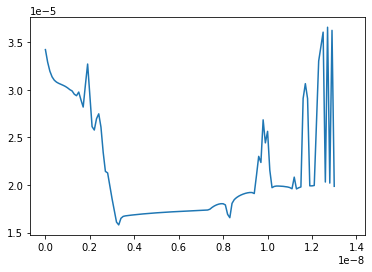

In [45]:
plt.plot(koff,error)
minerror = min(error)
for i in range(len(error)):
    if error[i] == minerror:
        x = koff[i]
print('The minimum error was at ' + str(x))